<a href="https://colab.research.google.com/github/tirtharajdash/BITS-G513_MetaLearning/blob/main/Lab_2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The below notebook has been adapted from Udacity's Deep Learning Course. \[ [GitHub](https://github.com/udacity/deep-learning-v2-pytorch) ]

# [ 1 ] Imports and Dataset

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
# Import necessary packages

import numpy as np
import torch
import matplotlib.pyplot as plt

In [3]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw
Processing...


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [4]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


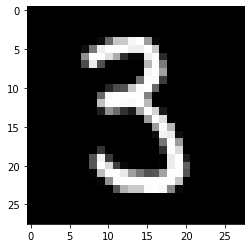

In [5]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

# [ 2 ] Define some Utility Functions

In [6]:
def view_classify(img, ps, version="MNIST"):

    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

# [ 3 ] Without ``torch.nn`` module

In [7]:
def activation(x):
    return 1/(1+torch.exp(-x))

def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1)

# Flatten the input images
inputs = images.view(images.shape[0], -1)

# Create parameters
w1 = torch.randn(784, 256)
b1 = torch.randn(256)
w2 = torch.randn(256, 10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs, w1) + b1)
out = torch.mm(h, w2) + b2
probabilities = softmax(out)

In [8]:
# Does it have the right shape? Should be (64, 10)
print(probabilities.shape)

# Does it sum to 1?
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


# [ 4 ] Using ``torch.nn``

In [9]:
from torch import nn

In [10]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [11]:
# Create the network and look at it's text representation
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

In [12]:
# Alterantively using `torch.nn.functional`

import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        # Hidden layer with sigmoid activation
        x = F.sigmoid(self.hidden(x))
        # Output layer with softmax activation
        x = F.softmax(self.output(x), dim=1)
        
        return x

In [13]:
# Create the network and look at it's text representation
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

# [ 5 ] Going Deeper into PyTorch's Networks

## 1 - Weight Initialzations

In [14]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Defining the layers, 128, 64, 10 units each
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        # Output layer, 10 units - one for each digit
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        ''' Forward pass through the network, returns the output logits '''
        
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
        
        return x

model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [15]:
print(model.fc1.weight)
print()
print(model.fc1.bias)

Parameter containing:
tensor([[ 0.0013,  0.0127, -0.0015,  ...,  0.0125,  0.0004,  0.0065],
        [-0.0072,  0.0028,  0.0151,  ...,  0.0302, -0.0104, -0.0152],
        [-0.0255, -0.0099,  0.0143,  ..., -0.0204, -0.0110,  0.0252],
        ...,
        [ 0.0109,  0.0080, -0.0191,  ..., -0.0225,  0.0116, -0.0021],
        [-0.0036,  0.0205,  0.0324,  ...,  0.0126, -0.0113,  0.0067],
        [-0.0040,  0.0331, -0.0262,  ..., -0.0228, -0.0058, -0.0136]],
       requires_grad=True)

Parameter containing:
tensor([-0.0237, -0.0336,  0.0218, -0.0215, -0.0146, -0.0225, -0.0042,  0.0317,
         0.0122, -0.0034, -0.0340, -0.0071, -0.0066, -0.0029, -0.0207,  0.0356,
         0.0118, -0.0324,  0.0077,  0.0158,  0.0252,  0.0201,  0.0230,  0.0184,
        -0.0005,  0.0128, -0.0327, -0.0172,  0.0174,  0.0070,  0.0080,  0.0231,
        -0.0350,  0.0271, -0.0313,  0.0212, -0.0346,  0.0231,  0.0168,  0.0078,
        -0.0166,  0.0201, -0.0022,  0.0307,  0.0196,  0.0091,  0.0306,  0.0246,
        -0.002

In [16]:
# Set biases to all zeros
model.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [17]:
# sample from random normal with standard dev = 0.01
model.fc1.weight.data.normal_(std=0.01)

tensor([[-3.2548e-03,  2.1738e-02, -1.1656e-02,  ...,  1.5541e-03,
         -1.4033e-03, -1.3931e-02],
        [-7.5724e-03,  3.4986e-03, -6.0333e-03,  ...,  2.5652e-03,
         -5.6972e-03, -1.1765e-02],
        [-4.4658e-03, -1.6383e-02, -6.9078e-03,  ...,  3.5372e-03,
         -1.6339e-02, -1.0208e-02],
        ...,
        [ 6.4741e-03, -5.8976e-03, -1.6922e-03,  ...,  9.4901e-05,
         -1.5281e-03, -1.6676e-03],
        [ 5.2318e-03,  4.7201e-03,  4.5195e-03,  ..., -9.3286e-03,
         -4.2044e-03, -1.8527e-02],
        [-6.6485e-04, -1.0920e-02,  6.2623e-03,  ...,  5.4906e-03,
          6.5992e-03, -2.7352e-03]])

## 2 - Examining an Iteration

In [18]:
from torch import optim

In [19]:
# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

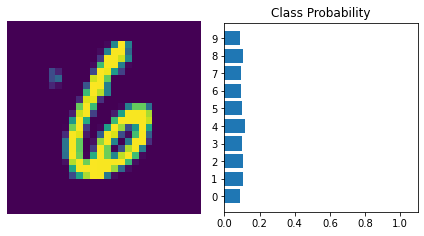

In [20]:
# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, get our logits
logits = model(images)
view_classify(images[0].view(1, 28, 28), logits[0])

In [21]:
# Calculate the loss with the logits and the labels

loss = criterion(logits, labels)
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()
print('\nAfter backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None

After backward pass: 
 tensor([[ 8.9665e-05,  8.9665e-05,  8.9665e-05,  ...,  8.9665e-05,
          8.9665e-05,  8.9665e-05],
        [-2.6962e-04, -2.6962e-04, -2.6962e-04,  ..., -2.6962e-04,
         -2.6962e-04, -2.6962e-04],
        [-1.6478e-04, -1.6478e-04, -1.6478e-04,  ..., -1.6478e-04,
         -1.6478e-04, -1.6478e-04],
        ...,
        [ 2.9283e-04,  2.9283e-04,  2.9283e-04,  ...,  2.9283e-04,
          2.9283e-04,  2.9283e-04],
        [ 2.1517e-04,  2.1517e-04,  2.1517e-04,  ...,  2.1517e-04,
          2.1517e-04,  2.1517e-04],
        [ 1.0974e-04,  1.0974e-04,  1.0974e-04,  ...,  1.0974e-04,
          1.0974e-04,  1.0974e-04]])


In [22]:
# Take an update step and few the new weights

optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[-0.0030, -0.0304, -0.0317,  ...,  0.0003, -0.0034, -0.0153],
        [-0.0355, -0.0290,  0.0003,  ..., -0.0307,  0.0349,  0.0163],
        [-0.0205, -0.0161,  0.0252,  ...,  0.0341, -0.0051, -0.0306],
        ...,
        [-0.0131, -0.0236,  0.0020,  ...,  0.0311, -0.0144,  0.0185],
        [ 0.0022, -0.0018,  0.0034,  ...,  0.0195,  0.0063, -0.0333],
        [-0.0191, -0.0177, -0.0276,  ...,  0.0209, -0.0112,  0.0356]],
       requires_grad=True)


## 3 - Training for Real

In [23]:
# Training

model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.9442185884091392
Training loss: 0.8645844296542312
Training loss: 0.5173114076860423
Training loss: 0.42437274727041024
Training loss: 0.381742939003495


Label:  tensor(5)


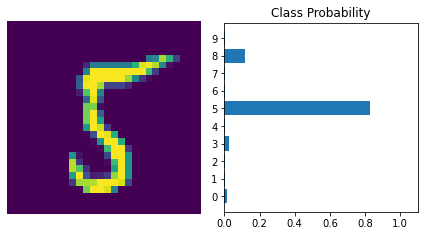

Label:  tensor(1)


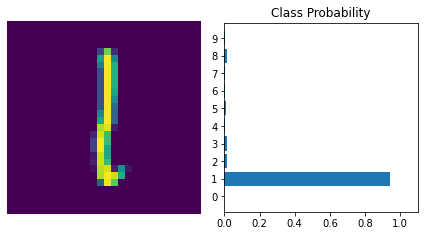

Label:  tensor(3)


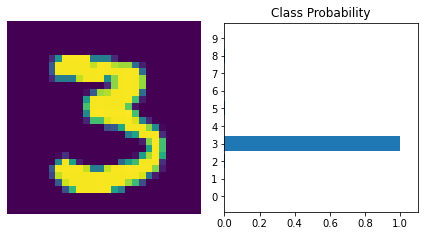

Label:  tensor(3)


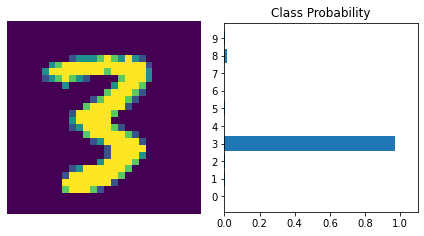

Label:  tensor(1)


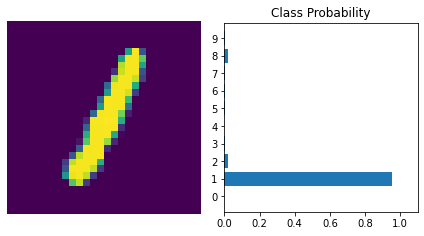

Label:  tensor(9)


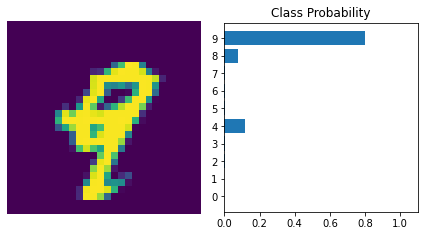

Label:  tensor(3)


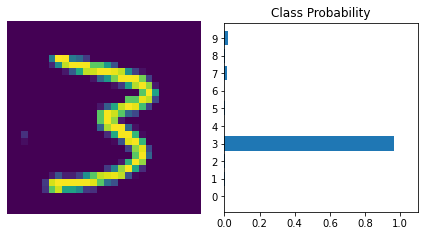

Label:  tensor(6)


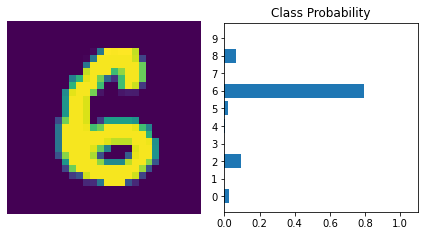

Label:  tensor(8)


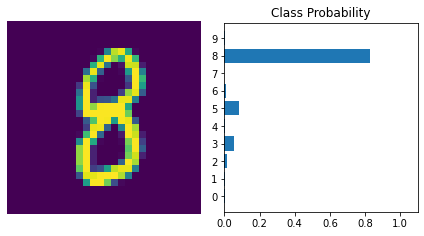

Label:  tensor(2)


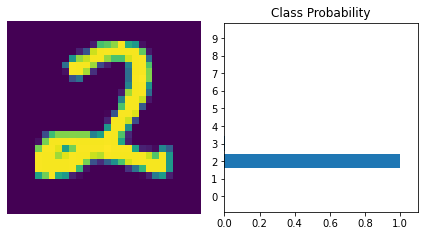

Label:  tensor(7)


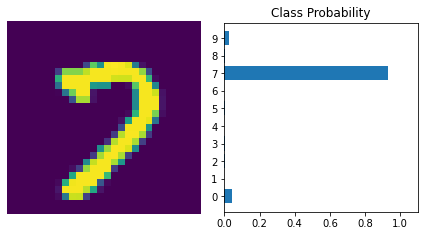

Label:  tensor(5)


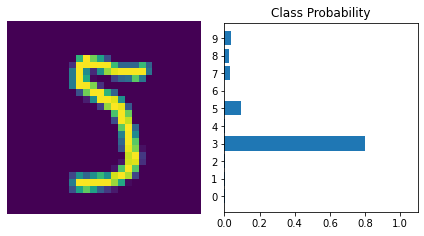

Label:  tensor(5)


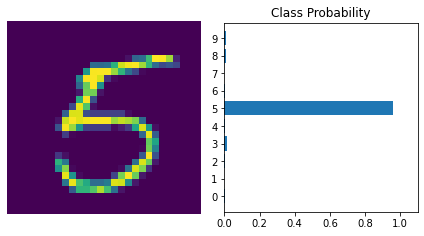

Label:  tensor(1)


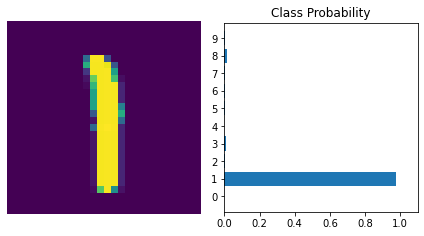

Label:  tensor(7)


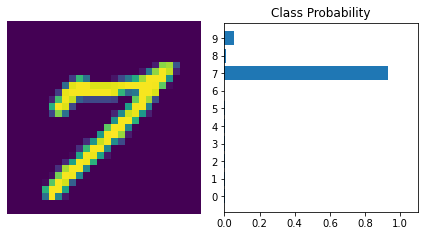

Label:  tensor(2)


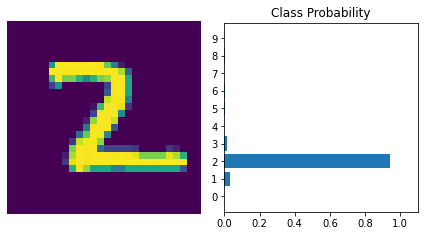

Label:  tensor(1)


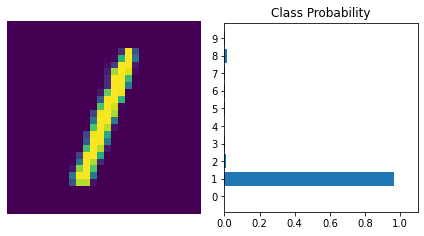

Label:  tensor(7)


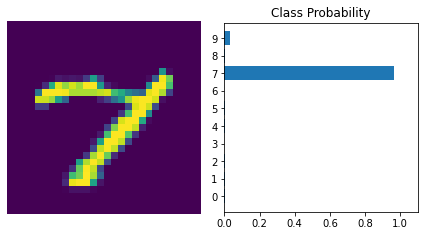

Label:  tensor(7)


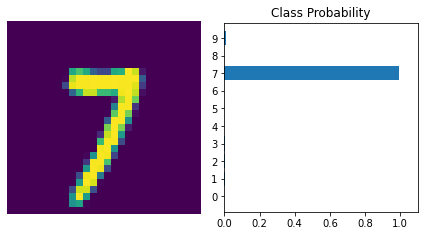

Label:  tensor(5)


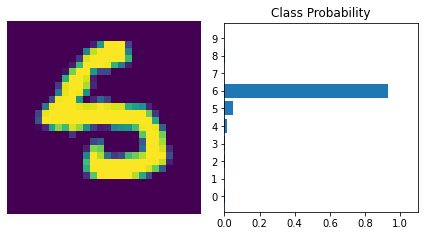

Label:  tensor(0)


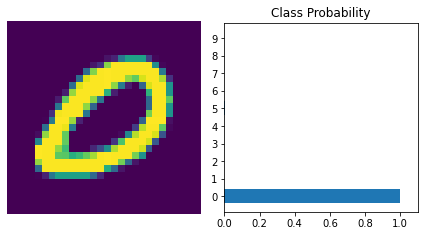

Label:  tensor(2)


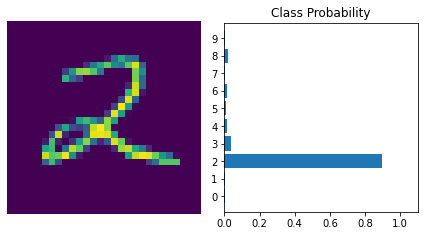

Label:  tensor(3)


KeyboardInterrupt: ignored

In [24]:
# Evaluation

images, labels = next(iter(trainloader))

# Turn off gradients to speed up this part
with torch.no_grad():
    for i in range(len(images)):
        img = images[i].view(1, 784)
        label = labels[i]

        # Output of the network are log-probabilities, need to take exponential for probabilities
        ps = torch.exp(model(img))
        print("Label: ", label)
        view_classify(img.view(1, 28, 28), ps)
        plt.show()